# Clustering

## Analysis 1  
In this section, we work directly with the raw data — no preprocessing or pipeline is applied.

In [16]:
# --- 📦 Standard Python Libraries --- #
import os  # For file and directory operations

# --- 📊 Data Manipulation and Visualization --- #
import pandas as pd                   # For data manipulation
import numpy as np                    # For numerical operations

import matplotlib                     # For configuring plotting backend
import matplotlib.pyplot as plt       # For creating plots
from matplotlib.colors import ListedColormap  # For custom color maps
import seaborn as sns                 # For statistical visualizations

# Enable inline plotting (only for Jupyter Notebooks)
%matplotlib inline

# --- 📈 Interactive Plotting --- #
import plotly.express as px           # For easy interactive plots and color palettes
import plotly.graph_objects as go     # For advanced 3D interactive plotting

# --- 💾 Model Persistence --- #
import joblib                         # For saving and loading trained models

# --- ⚙️ Project Configuration --- #
from config import (
    project_folder,     # Root folder of the project
    cleaned_data,       # Path to cleaned/preprocessed data
    models_folder,      # Path to save/load trained models
    rgb_color,          # Custom RGB color for plots
    palette,             # Custom color palette for visualizations
    random_state
)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [17]:
# Get data
df = pd.read_csv(cleaned_data)
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


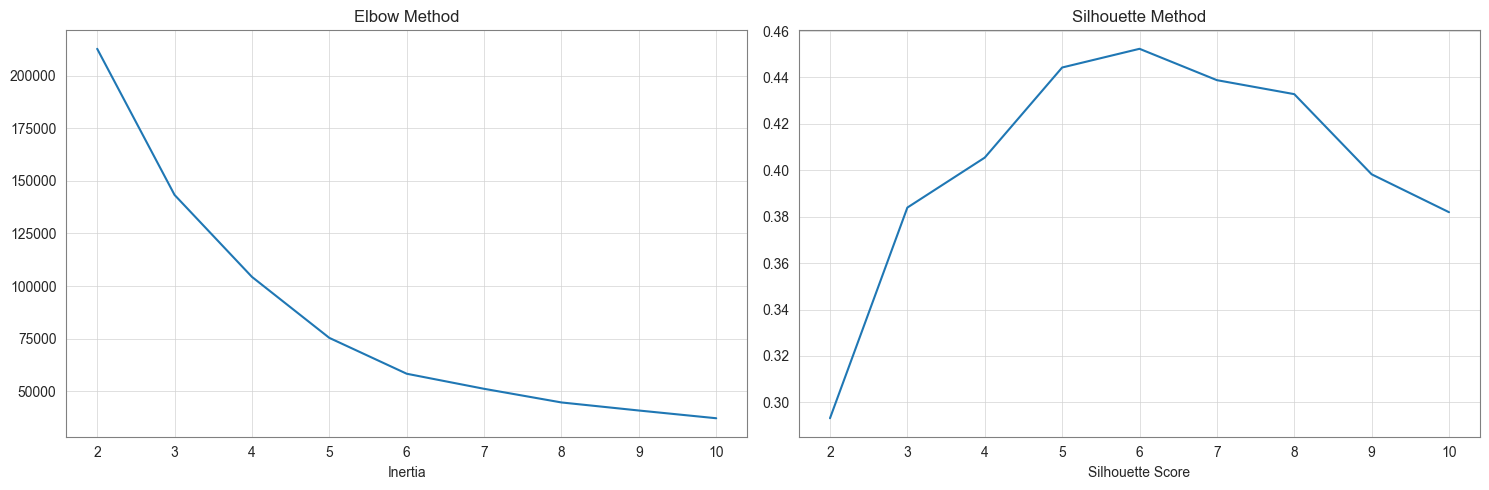

In [18]:
# Silhouette and Elbow Method for KMeans Clustering

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), tight_layout=True)

elbow = {}
silhouette = []

k_range = range(2, 11)

X = df.drop("Gender", axis=1)

for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state= random_state, n_init=10)
    kmeans.fit(X)
    elbow[i] = kmeans.inertia_
    
    labels = kmeans.labels_
    silhouette.append(silhouette_score(X, labels))
    
sns.lineplot(x=list(elbow.keys()), y=list(elbow.values()), ax=axs[0])
axs[0].set_xlabel("K")
axs[0].set_xlabel("Inertia")
axs[0].set_title("Elbow Method")

sns.lineplot(x=list(k_range), y=silhouette, ax=axs[1])
axs[1].set_xlabel("K")
axs[1].set_xlabel("Silhouette Score")
axs[1].set_title("Silhouette Method")

plt.show()

In [19]:
# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=6, random_state= random_state, n_init=10)
kmeans.fit(X)
kmeans.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [20]:
# Save the trained KMeans model to disk using Joblib
joblib.dump(kmeans, "../Models/kmeans.pkl")

['../Models/kmeans.pkl']

In [21]:
# Create a copy of the original DataFrame and assign the cluster labels from the trained KMeans model
df_clustered = df.copy()
df_clustered["cluster"] = kmeans.labels_

# Display the first few rows of the clustered DataFrame
print(df_clustered.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0    Male   19                  15                      39        5
1    Male   21                  15                      81        2
2  Female   20                  16                       6        5
3  Female   23                  16                      77        2
4  Female   31                  17                      40        5


In [22]:
# Export the clustered DataFrame to a CSV file without the index column
df_clustered.to_csv("../Data/Mall_Customers_no_CustomerID_clustered.csv", index=False)

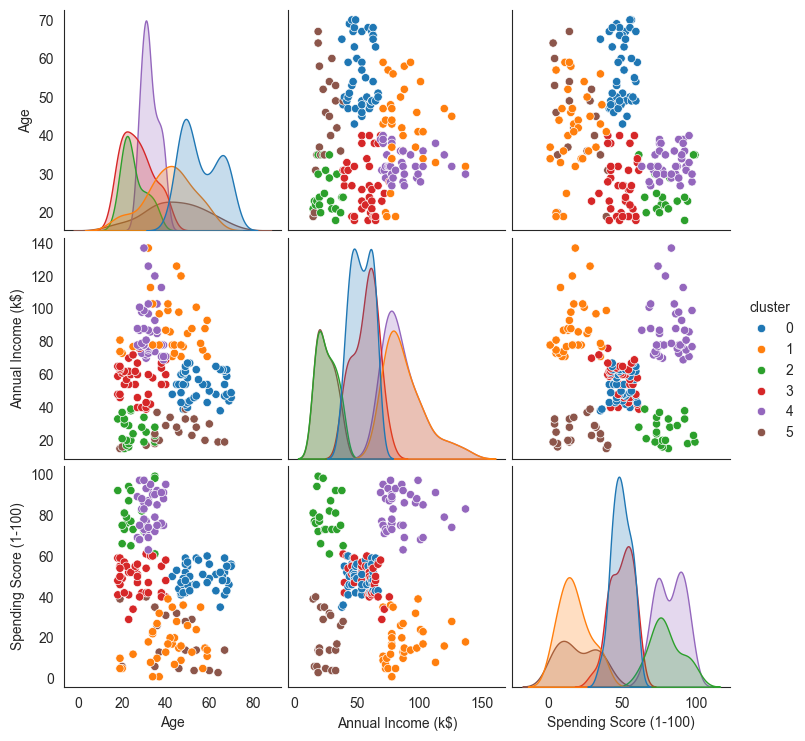

In [23]:
# Generate a pairplot with KDE on the diagonal, color-coded by cluster using the 'tab10' palette

# Set style without gridlines
sns.set_style("white")

# Create a pairplot grouped by cluster with a clean background and distinct colors
sns.pairplot(
    df_clustered,
    diag_kind="kde",
    hue="cluster",
    palette="tab10"
)


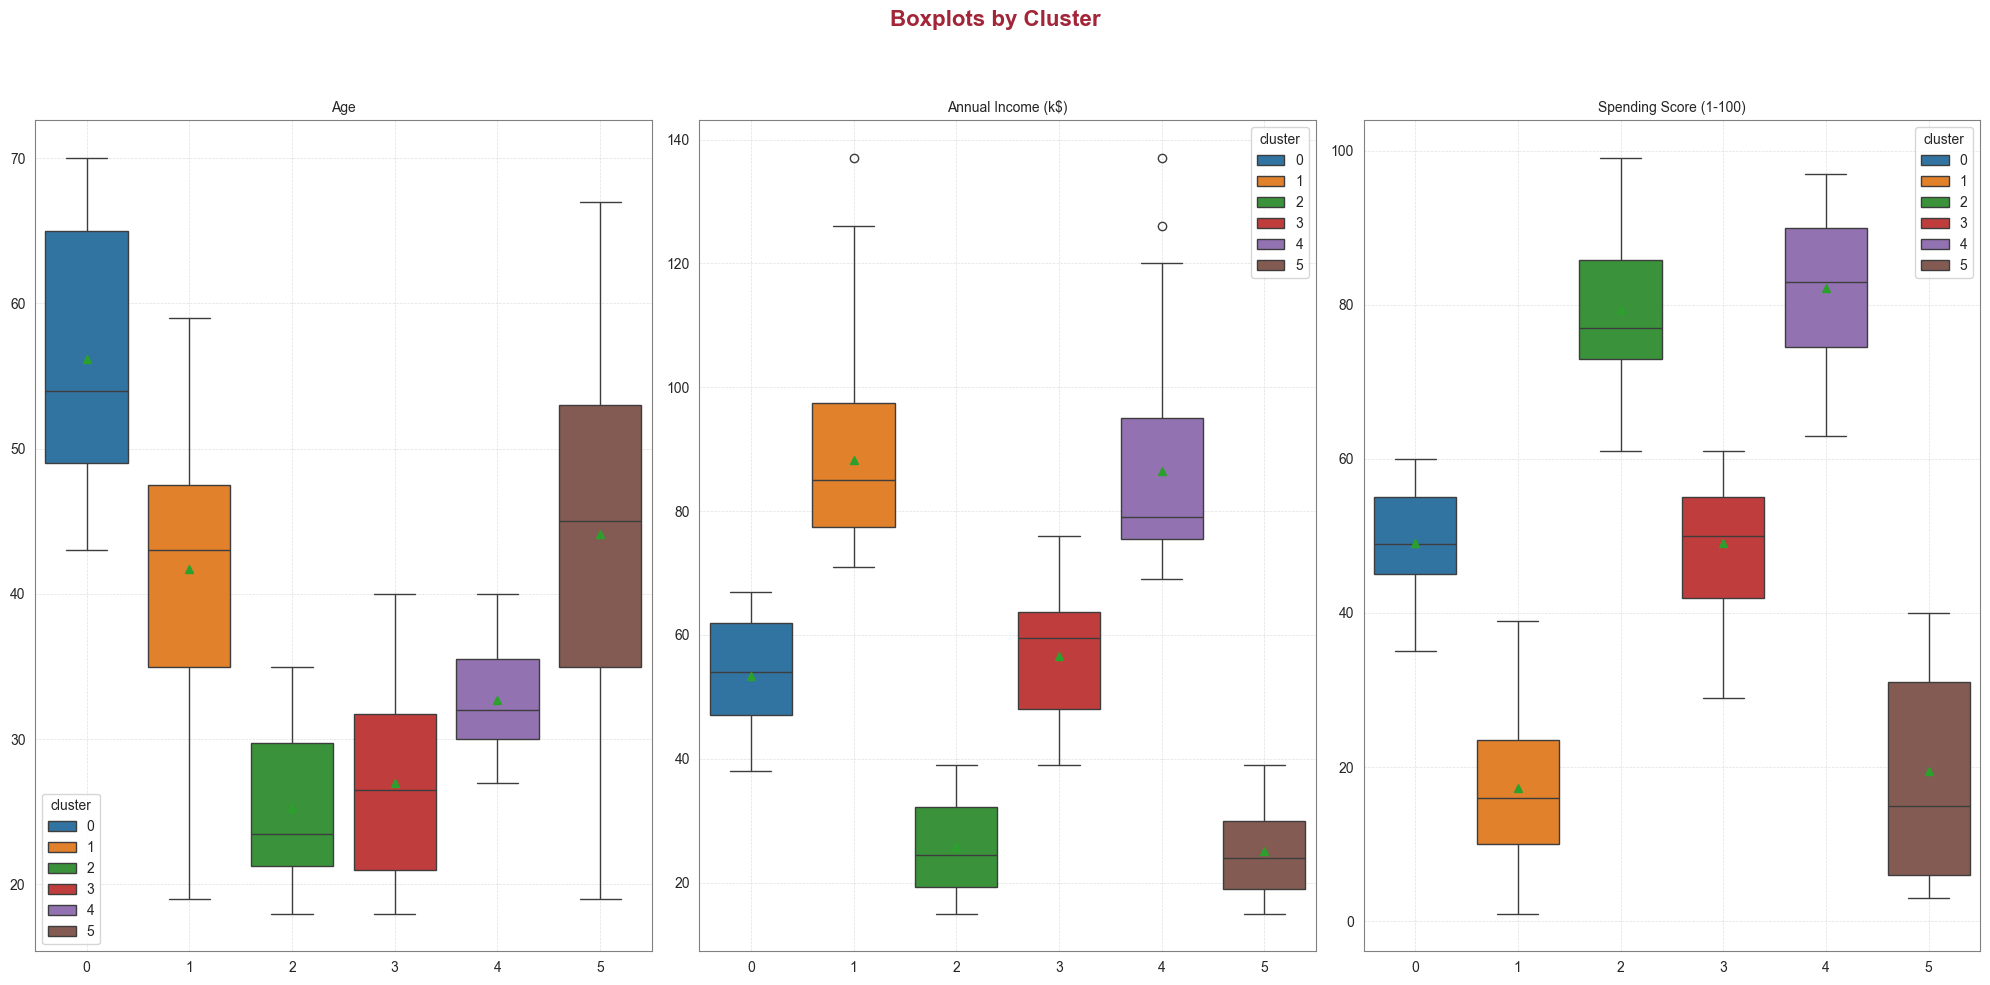

In [24]:
# Generate vertical boxplots for numeric variables by cluster


# Set clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "grid.color": "lightgray",
    "grid.linewidth": 0.5,
    "axes.edgecolor": "gray"
})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Add main title
fig.suptitle("Boxplots by Cluster", fontsize=16, fontweight='bold', color=rgb_color)

# Plot each numeric variable as vertical boxplot with hue = cluster
for ax, column in zip(axs.flatten(), df_clustered.select_dtypes("number").drop(columns="cluster").columns):
    sns.boxplot(
        x="cluster",
        y=column,
        data=df_clustered,
        ax=ax,
        showmeans=True,
        hue="cluster",
        linewidth=1,
        palette="tab10"
    ) 
    ax.set_title(column, fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_facecolor("white")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


### 🧠 Interpretação dos Clusters

| Cluster Nº | Renda    | Idade     | Pontuação de Gastos |
|------------|----------|-----------|----------------------|
| 0          | Moderada | Alta      | Moderada             |
| 1          | Alta     | Moderada  | Baixa                |
| 2          | Baixa    | Jovem     | Alta                 |
| 3          | Moderada | Jovem     | Moderada             |
| 4          | Alta     | Jovem     | Alta                 |
| 5          | Baixa    | Moderada  | Baixa                |


In [29]:
# Count the number of observations in each cluster, sorted by cluster label
print(df_clustered["cluster"].value_counts().sort_index())

cluster
0    45
1    35
2    22
3    38
4    39
5    21
Name: count, dtype: int64


In [30]:
# Calculate the percentage of observations in each cluster, sorted by cluster label
print(df_clustered["cluster"].value_counts(normalize=True).mul(100).sort_index())

cluster
0    22.5
1    17.5
2    11.0
3    19.0
4    19.5
5    10.5
Name: proportion, dtype: float64


In [31]:
# Count the number of observations by cluster and gender
print(df_clustered.groupby(by=["cluster", "Gender"]).size())

cluster  Gender
0        Female    25
         Male      20
1        Female    15
         Male      20
2        Female    13
         Male       9
3        Female    25
         Male      13
4        Female    21
         Male      18
5        Female    13
         Male       8
dtype: int64


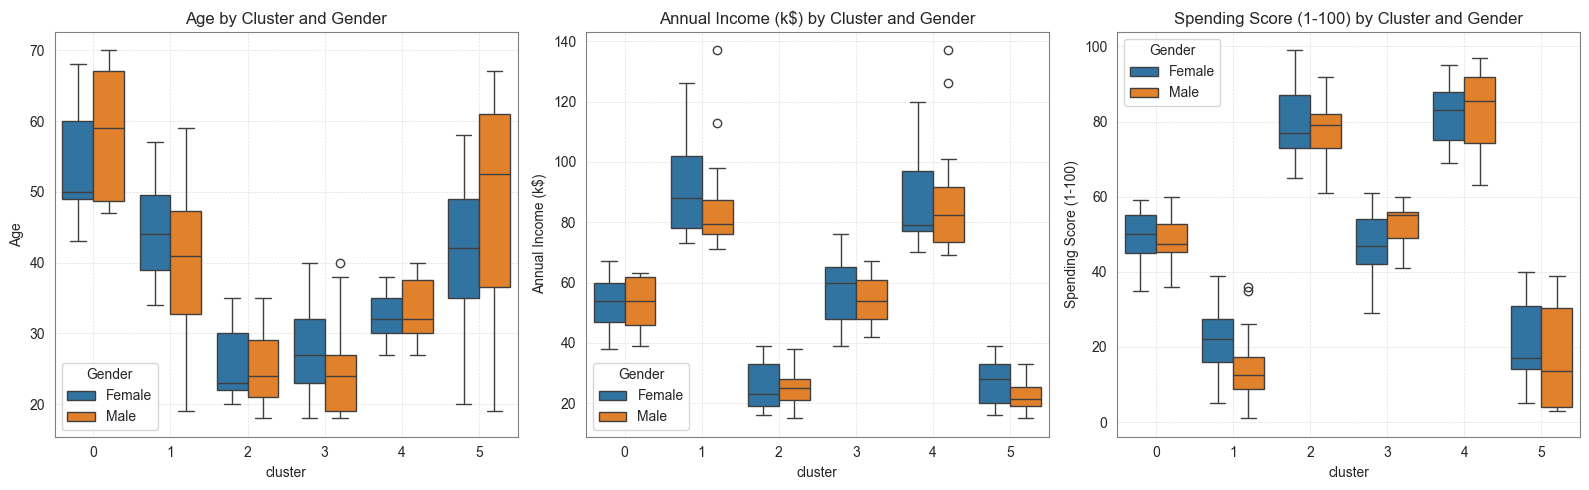

In [32]:
# Create side-by-side boxplots for each numeric variable, grouped by cluster and colored by gender

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Loop through each numeric column and create a boxplot
for ax, col in zip(axs, df_clustered.select_dtypes("number").drop(columns="cluster")):
    sns.boxplot(
        data=df_clustered,
        x="cluster",
        y=col,
        ax=ax,
        hue="Gender"
    )
    ax.set_title(f"{col} by Cluster and Gender")
    ax.set_facecolor("white")
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


## Analysis 2  
Here, we generate visualizations to better understand the characteristics of each cluster.

In [33]:
# Delete specific variables
del axs, elbow, ax, df, X, df_clustered, silhouette, labels

In [34]:
df = pd.read_csv(
    project_folder / "Data" / "Mall_Customers_no_CustomerID_clustered.csv"
)

print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0    Male   19                  15                      39        5
1    Male   21                  15                      81        2
2  Female   20                  16                       6        5
3  Female   23                  16                      77        2
4  Female   31                  17                      40        5


In [35]:
# Load the previously saved KMeans model from disk
kmeans = joblib.load("../Models/kmeans.pkl")

# Access the cluster labels assigned to each observation
kmeans.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [36]:
# Retrieve the coordinates of the cluster centers (centroids) in feature space
kmeans.cluster_centers_


array([[56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [32.69230769, 86.53846154, 82.12820513],
       [44.14285714, 25.14285714, 19.52380952]])

In [37]:
# Display the list of column names in the clustered DataFrame
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')

In [38]:
# --- 3D Cluster Visualization Function with Optional Centroids and Points --- #

def plot_clusters_3d(
    dataframe,
    columns,               # List with 3 column names for the 3D axes
    n_colors,              # Number of distinct clusters/colors
    show_centroids=True, 
    show_points=False
):
    # Create a 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Define color palette based on the number of clusters
    colors = plt.cm.tab10.colors[:n_colors]
    colors = ListedColormap(colors)

    # Get cluster centroids from the trained KMeans model
    centroids = kmeans.cluster_centers_

    # Extract coordinates for plotting
    x = dataframe[columns[0]]
    y = dataframe[columns[1]]
    z = dataframe[columns[2]]

    # Plot centroids
    if show_centroids:
        for i, centroid in enumerate(centroids):
            ax.scatter(*centroid, s=500, alpha=0.5)
            ax.text(*centroid, f"{i}", fontsize=20,
                    horizontalalignment="center",
                    verticalalignment="center")

    # Plot data points colored by cluster
    if show_points:
        scatter = ax.scatter(x, y, z, c=dataframe["cluster"], cmap=colors)
        ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.3, 1))

    # Set axis labels and title
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_zlabel(columns[2])
    ax.set_title("Clusters")

    # Show plot
    plt.show()

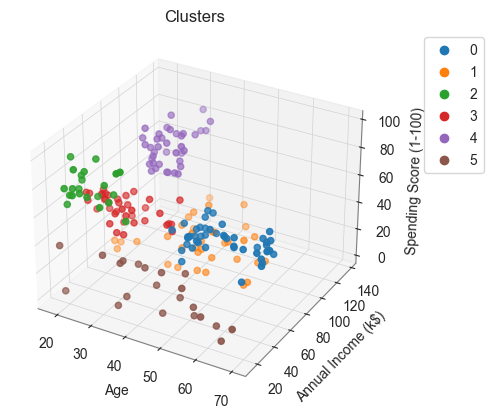

In [39]:
# 3D visualization of clusters using Age, Annual Income, and Spending Score as axes
# Displays individual data points colored by cluster, without showing the cluster centroids
plot_clusters_3d(
    df,
    ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    6,
    show_points= True,
    show_centroids= False
)

In [40]:
def plot_clusters_3d_interactive(dataframe, columns, n_colors, show_centroids=True):
    # Define the 3D axes
    x = dataframe[columns[0]]
    y = dataframe[columns[1]]
    z = dataframe[columns[2]]
    cluster_labels = dataframe["cluster"]
    
    # Define color palette (tab10 has 10 distinct colors)
    colors = px.colors.qualitative.T10[:n_colors]

    fig = go.Figure()

    # Plot each cluster separately for better legend handling
    for cluster_id in sorted(cluster_labels.unique()):
        cluster_data = dataframe[dataframe["cluster"] == cluster_id]
        fig.add_trace(go.Scatter3d(
            x=cluster_data[columns[0]],
            y=cluster_data[columns[1]],
            z=cluster_data[columns[2]],
            mode='markers',
            marker=dict(
                size=5,
                color=colors[cluster_id],
                opacity=0.7
            ),
            name=f"Cluster {cluster_id}"
        ))

    # Optionally plot centroids
    if show_centroids:
        centroids = kmeans.cluster_centers_
        centroid_x = centroids[:, dataframe.columns.get_loc(columns[0])]
        centroid_y = centroids[:, dataframe.columns.get_loc(columns[1])]
        centroid_z = centroids[:, dataframe.columns.get_loc(columns[2])]
        
        fig.add_trace(go.Scatter3d(
            x=centroid_x,
            y=centroid_y,
            z=centroid_z,
            mode='markers+text',
            marker=dict(size=10, color='black', symbol='x'),
            text=[f"C{i}" for i in range(len(centroids))],
            textposition="top center",
            name="Centroids"
        ))

    # Update layout
    fig.update_layout(
        title="Interactive 3D Cluster Plot",
        scene=dict(
            xaxis_title=columns[0],
            yaxis_title=columns[1],
            zaxis_title=columns[2]
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig.show()


In [41]:
plot_clusters_3d_interactive(
    df,
    ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    n_colors = 6,
    show_centroids = False 
)
